## Title: Data Preprocessing for a Healthcare Study


#### Problem Statement:
A healthcare provider needs to clean and preprocess patient data for an upcoming study. Handle missing values, identify and treat outliers, and apply necessary transformations to ensure data quality.


## Steps to be followed

1. **Create Sample Dataset:**
   - We create a sample dataset with 500 patients, including additional attributes such as height, weight, blood_pressure, cholesterol, glucose, smoking_status, physical_activity, and disease_history.

2. **Calculate BMI:**
   - Calculate the Body Mass Index (BMI) using the formula: weight (kg) / (height (m) ^ 2).

3. **Introduce Missing Values:**
   - Randomly introduce missing values in cholesterol, glucose, and physical_activity columns.

4. **Handle Missing Values:**
   - Fill missing values in cholesterol and glucose with the mean.
   - Fill missing values in physical_activity with the median.

5. **Identify and Treat Outliers:**
   - Use the Z-score method to identify outliers in cholesterol, glucose, and bmi.
   - Cap outliers by replacing values beyond 3 standard deviations from the mean with the respective upper and lower limits.

6. **Apply Necessary Transformations:**
   - Convert gender and blood_pressure to categorical variables.

7. **Save Cleaned Data:**
   - Save the cleaned and preprocessed data to a CSV file for further analysis.

8. **Visualizations:**
   - Plot the distribution of ages and BMI.
   - Create a boxplot of cholesterol levels by smoking status.


**Step 1: Import libraries and Create Sample Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Create sample data**

In [2]:
patient_data = {
'patient_id': range(1, 501),
'age': np.random.randint(18, 90, 500),
'gender': np.random.choice(['male', 'female'], 500),
'height': np.random.uniform(140, 200, 500),
'weight': np.random.uniform(45, 150, 500),
'blood_pressure': np.random.choice(['normal', 'elevated', 'hypertension_stage_1', 'hypertension_stage_2'], 500),
'cholesterol': np.random.uniform(100, 300, 500),
'glucose': np.random.uniform(70, 200, 500),
'smoking_status': np.random.choice(['never', 'former', 'current'], 500),
'physical_activity': np.random.randint(0, 300, 500),
'disease_history': np.random.choice([0, 1], 500)
}

**Convert to DataFrame**

In [3]:
df = pd.DataFrame(patient_data)

In [4]:
print(df)

     patient_id  age  gender      height      weight        blood_pressure  \
0             1   87    male  149.419093   86.706227  hypertension_stage_1   
1             2   52  female  148.477675  111.435616              elevated   
2             3   21  female  164.429759   64.717451  hypertension_stage_2   
3             4   69  female  144.365347  111.358203  hypertension_stage_1   
4             5   66    male  159.154729  134.171167  hypertension_stage_2   
..          ...  ...     ...         ...         ...                   ...   
495         496   28    male  180.784778  145.513980  hypertension_stage_2   
496         497   67    male  198.929669  110.964013              elevated   
497         498   59    male  142.407389   94.153689  hypertension_stage_1   
498         499   47    male  148.533900  102.283412  hypertension_stage_1   
499         500   61    male  159.385495   77.718769  hypertension_stage_2   

     cholesterol     glucose smoking_status  physical_activity 

**Step 2: Calculate BMI** **bold text**

In [5]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

In [6]:
print(df['bmi'])

0      38.836322
1      50.547735
2      23.936495
3      53.431368
4      52.968796
         ...    
495    44.522649
496    28.040324
497    46.427179
498    46.361133
499    30.593441
Name: bmi, Length: 500, dtype: float64


**Introduce some missing values randomly**

In [7]:
df.loc[np.random.choice(df.index, 20, replace=False), 'cholesterol'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'glucose'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'physical_activity'] = np.nan

**Step 3: Load Data into DataFrame**

In [8]:
print(df.head())

   patient_id  age  gender      height      weight        blood_pressure  \
0           1   87    male  149.419093   86.706227  hypertension_stage_1   
1           2   52  female  148.477675  111.435616              elevated   
2           3   21  female  164.429759   64.717451  hypertension_stage_2   
3           4   69  female  144.365347  111.358203  hypertension_stage_1   
4           5   66    male  159.154729  134.171167  hypertension_stage_2   

   cholesterol     glucose smoking_status  physical_activity  disease_history  \
0   112.411608  177.225787          never              165.0                1   
1   112.380409  192.701765          never               33.0                0   
2   236.545794  119.190509          never               75.0                0   
3   141.615295         NaN          never               62.0                1   
4   164.928610  106.047781        current                4.0                1   

         bmi  
0  38.836322  
1  50.547735  
2  23.93649

**Step 4: Handle Missing Values**

In [9]:
# Fill missing values in 'cholesterol' and 'glucose' with mean
df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

# Fill missing values in 'physical_activity' with median
df['physical_activity'].fillna(df['physical_activity'].median(), inplace=True)


<ipython-input-9-23b5bc8364ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
<ipython-input-9-23b5bc8364ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

**Step 5: Identify and Treat Outliers**


In [10]:
# Z-score method to identify outliers
def identify_outliers_zscore(df, column):
    df['zscore'] = (df[column] - df[column].mean()) / df[column].std()
    outliers = df[np.abs(df['zscore']) > 3]
    return outliers

cholesterol_outliers = identify_outliers_zscore(df, 'cholesterol')
glucose_outliers = identify_outliers_zscore(df, 'glucose')
bmi_outliers = identify_outliers_zscore(df, 'bmi')

# Treat outliers by capping
def cap_outliers(df, column):
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

df = cap_outliers(df, 'cholesterol')
df = cap_outliers(df, 'glucose')
df = cap_outliers(df, 'bmi')

# Drop the zscore column used for identifying outliers
df.drop(columns=['zscore'], inplace=True)


**Step 6: Apply Necessary Transformations**


In [11]:
# Convert 'gender' and 'blood_pressure' to categorical variables
df['gender'] = df['gender'].astype('category')
df['blood_pressure'] = df['blood_pressure'].astype('category')


**Step 7: Save cleaned data to CSV for further analysis**


In [12]:
df.to_csv('cleaned_patient_data.csv', index=False)

print("Data cleaning and preprocessing complete. Cleaned dataset saved to CSV.")
print(df.head())


Data cleaning and preprocessing complete. Cleaned dataset saved to CSV.
   patient_id  age  gender      height      weight        blood_pressure  \
0           1   87    male  149.419093   86.706227  hypertension_stage_1   
1           2   52  female  148.477675  111.435616              elevated   
2           3   21  female  164.429759   64.717451  hypertension_stage_2   
3           4   69  female  144.365347  111.358203  hypertension_stage_1   
4           5   66    male  159.154729  134.171167  hypertension_stage_2   

   cholesterol     glucose smoking_status  physical_activity  disease_history  \
0   112.411608  177.225787          never              165.0                1   
1   112.380409  192.701765          never               33.0                0   
2   236.545794  119.190509          never               75.0                0   
3   141.615295  135.860639          never               62.0                1   
4   164.928610  106.047781        current                4.0      

**step 8: Display the cleaned DataFrame**

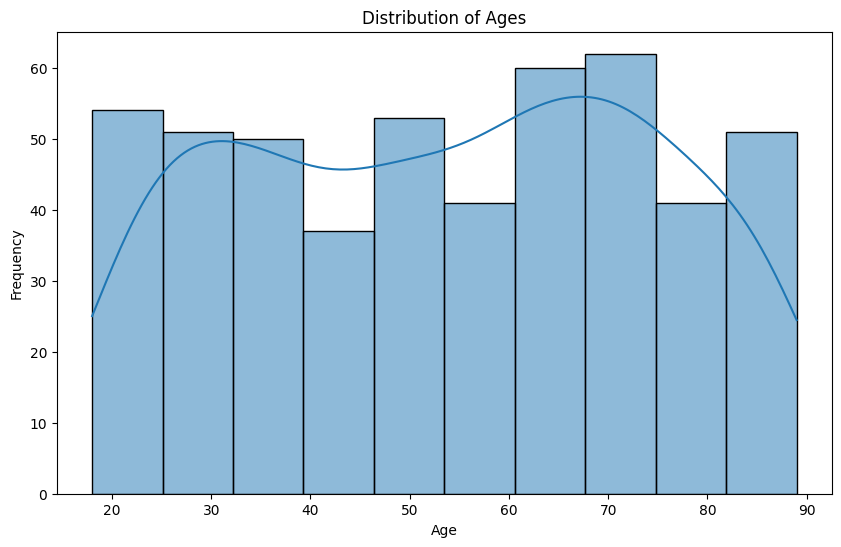

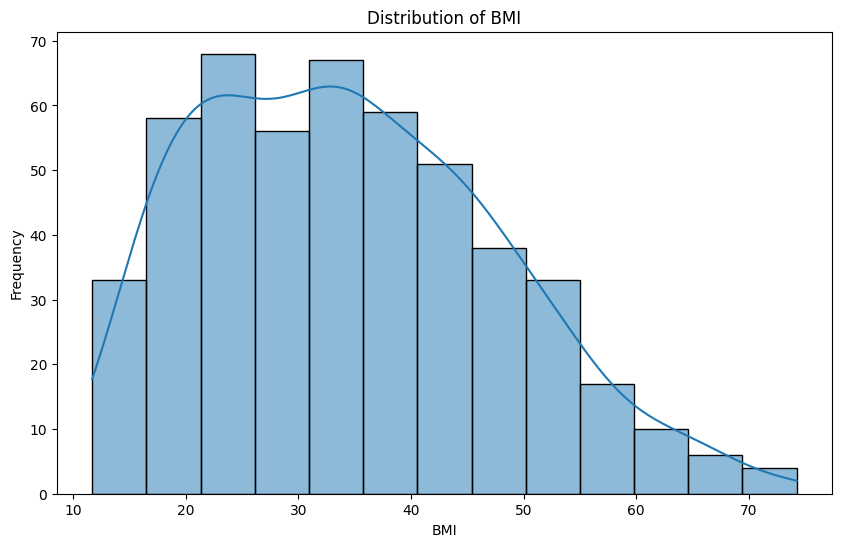

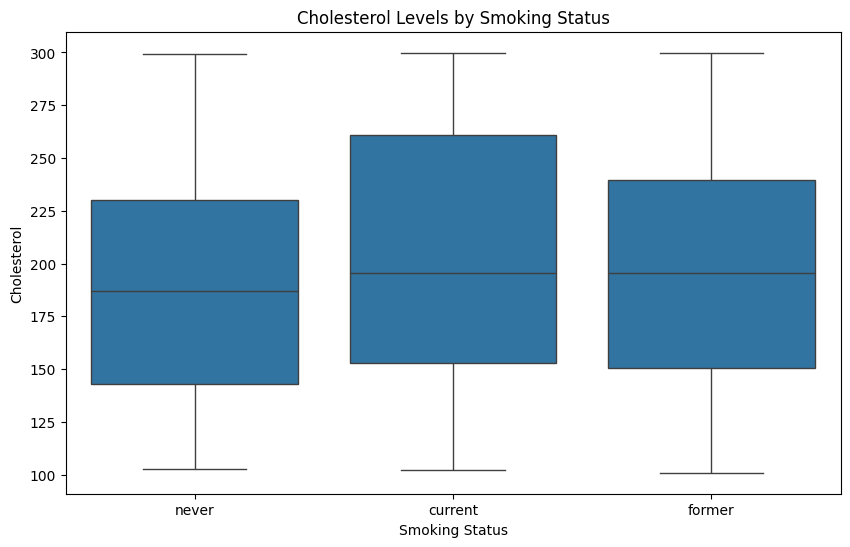

In [13]:
# Visualizations
# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Boxplot of cholesterol levels by smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_status', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Cholesterol')
plt.show()
